<a href="https://colab.research.google.com/github/SyedIzzatUllah/SVM-Implementation-in-Python/blob/main/SVM_Implementationin_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load libaries
import numpy as np
import math

In [2]:
class SVM:

	def fit(self, data ):

		# Our goal is to find out w ( Direction ) and b ( Interception ) for optimial hyperplane wx+b
		# for that, we'll try various w and b values

		b_step_size = 2
		b_multiple = 5

		# finding possiblity of hyperplane in left top, right top, left bottom and right bottom axes. 
		axes = [ [1,1],[-1,1],[-1,-1],[1,-1] ]


		# let's find out maximum and minimum feature value

		features = np.concatenate((data[-1],data[1]))
		max_feature_value = np.max(features)
		min_feature_value = np.min(features)
		learning_rate = max_feature_value * .001


		# Possible b values
		b_range = np.arange( -1 * (max_feature_value * b_step_size), max_feature_value * b_step_size, learning_rate * b_multiple )

		# this is just assumation for starting point.
		w_optimum = max_feature_value / 2
		w = np.array([w_optimum, w_optimum])
		optimized = False
		hyperplane_collection = {}
		while not optimized:
			for b in b_range:
				for section in axes:
					may_be_w = w*section
					suitable_hyperplane = True
					
					for one in data:
						for feature_data in data[one]:
							if one*(np.dot(may_be_w,feature_data) +b) < 1:
								# if any feature data is within the hyperplane margin, that's not the suitable hyperplane.
								suitable_hyperplane = False

					if suitable_hyperplane:

						# Calculate length of hyperplane direction
						hyperplane_norm = np.linalg.norm(may_be_w) # || w ||
						
						# we need to keep track of these possible hyperplane. later, we'll choose which has minimum hyperplace norm as optimizal hyperplane.
						hyperplane_collection[ hyperplane_norm ] = [may_be_w,b] # Save w and b	

			if w[0] < 0:
				optimized = True
			else:
				w = w-learning_rate	

		# now sort by norm length
		norms = sorted([n for n in hyperplane_collection])
		minimum_norm = norms[0]

		# This one is optimizal hyperplane
		optimal_hyperplane = hyperplane_collection[minimum_norm]

		self.w = optimal_hyperplane[0]
		self.b = optimal_hyperplane[1]
		
	#fit(data)

	def calculate_y(self,x,w,b,v):
		# w.x+b = v
		# w0x0 + w1x1 + b = v
		# x1 = (v - w0x0 - b)/w1
		y = (v - w[0] * x - b) / w[1]
		return y

	def show_hyperplane(self,data):

		import matplotlib.pyplot as plt
		
		w = self.w
		b = self.b

		features = np.concatenate((data[-1],data[1]))
		
		x1 = np.max(features)
		y1 = self.calculate_y(x1, w, b, 0)
		
		x2 = np.min(features)
		y2 = self.calculate_y(x2, w, b, 0)
		
		figure = plt.figure()
		ax = figure.add_subplot(1,1,1)

		plt.scatter(data[-1][:,0],data[-1][:,1],marker="o", c="r")
		plt.scatter(data[1][:,0],data[1][:,1],marker="+", c="g")
		
		# This line should clearly separate male and female dataset
		ax.plot([x1,x2],[y1,y2],'k')
		
		plt.show()
		

	def predict(self,features):
		w = self.w
		b = self.b
		classification = np.sign(np.dot(np.array(features),w) + b)
		return classification

**Usage of SVM:**

In [3]:
# Sample Data - (weight (kg), Height (cm), gender)
sample_data = np.array([
	[70,175,'male'],
	[60,140,'female'],
	[80,185,'male'],
	[75,180,'male'],
	[65,150,'female'],
	[70,155,'female'],
	[75,160,'female'],
	[85,195,'male'],
	[55,170,'female'],
	[65,175,'female'],
	])

In [4]:
features = sample_data[:,:2].astype('float')
target = sample_data[:,2]

# Assign -1 to female and +1 to male
plusone = []
minusone = []

for i,gender in enumerate(target):

	if gender == 'male':
		plusone.append(features[i])
	else:
		minusone.append(features[i])

data = { -1: np.array(minusone), 1: np.array(plusone) }
classify = { -1: 'Female', 1: 'Male' }

In [5]:
# Target - What is gender if weight is 50kg and height is 172cm ?
guess = [[50,172]]

In [6]:
# Setup SVM Model
model = SVM()

In [7]:
# Train the Model
model.fit(data)

In [8]:
# Output
prediction = model.predict(guess).astype('int')

In [9]:
print("Gender is %s" %(classify[prediction[0]]))

Gender is Female


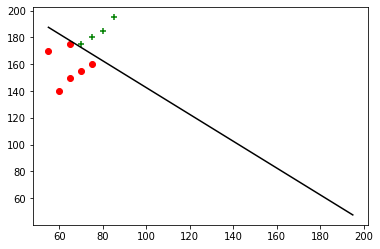

In [10]:
# Show optimial hyperplane. 
model.show_hyperplane(data)